#Problem Statement

Predicting the retail customer retention potential level as high/medium/low &  Customer Segmentation & Pattern extraction.

It is important for any retail company to focus on customer though continuous engagement which translates to increased sales and resultant profitability measured over a period. The customer churn results in not just loss of potential revenue and future profits together with sunk acquisition costs but also negative publicity and incurrence of additional cost of new acquisitions.

On the other hand, Customer focus leads to retention which in turn leads to generation of value, not just volumes. Thus, understanding of customer churn and the underlying factors is central to customer relationship management.

Retailers develop metric to capture customer response towards the product, service, price and competition so that they offer better products and service delivery to customers in comparison with competition. In retail business, a customer is treated as churned once his/her transactions/interactions/visits outdate a particular amount of time. It happens when the product/service is no more used or he uses a product/service of competitor. It is useful to understand defected customer in terms of interests and preferences  to win them back.

It is possible to understand the customer based on historical data of customers containing the characteristics of customers, their transactions, the interactions with them  etc. Customer churn predictions help the retail company devise suitable marketing programs to target specific groups of retail customers as part of continued engagement. To ensure that such marketing spend is appropriately directed to the customers likely to be retained and/or with high probability of retention, we are required to classify the retention potential of customer as High/Medium/Low.

Here identifying the medium level customers is important as this category indicates where some intelligent action may lead to high possibility of retaining the customers who are likely to churn.

#Import Libraries

In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Normalization,BatchNormalization
from keras.utils import to_categorical
from sklearn.model_selection import learning_curve, validation_curve
from sklearn.metrics import make_scorer
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

#Import the Datasets

##Customerdata_Train

In [131]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [132]:
# Read the Customer data path

Customerdata_filepath = r'/content/drive/MyDrive/CAPSTONE/Train/Customerdata_Train.xlsx'

In [133]:
# Read the excel file

customerdata = pd.read_excel(Customerdata_filepath)

In [134]:
# Print the first five rows of the data

customerdata.head(10)

,CustomerID,City,DateOfRegistration,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay
0,C16368,CITY2,2012-09-28,0,0,0,Monday
1,C20345,CITY2,2010-12-19,1,1,1,Friday
2,C17683,CITY2,2010-10-03,0,0,0,Wednesday
3,C18647,CITY4,2010-11-27,0,0,0,Monday
4,C36692,CITY2,2009-12-04,1,1,0,Friday
5,C13831,CITY2,2010-12-29,1,0,0,Monday
6,C40881,CITY2,2010-09-22,0,0,1,Friday
7,C26246,CITY2,2009-11-16,0,0,0,Wednesday
8,C36136,CITY2,2009-07-25,1,1,1,Monday
9,C34046,CITY2,2010-03-14,0,0,0,Tuesday


In [135]:
# Check the shape of the data

customerdata.shape

(23820, 7)

In [136]:
#info method returns a concise summary of the data.

customerdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23820 entries, 0 to 23819
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   CustomerID            23820 non-null  object        
 1   City                  23820 non-null  object        
 2   DateOfRegistration    23820 non-null  datetime64[ns]
 3   OnlineCommunication   23820 non-null  int64         
 4   AutomaticRefill       23820 non-null  int64         
 5   DoorstepDelivery      23820 non-null  int64         
 6   PreferredDeliveryDay  23820 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 1.3+ MB


In [137]:
#Describe function to generate a statistical summary that describes the data.

customerdata.describe()

,OnlineCommunication,AutomaticRefill,DoorstepDelivery
count,23820.000000,23820.000000,23820.000000
mean,0.660411,0.094710,0.037615
std,0.473580,0.292821,0.190268
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000
75%,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000


In [138]:
#Describe function to generate a statistical summary that describes the categorical data.

customerdata.describe(include='O')

,CustomerID,City,PreferredDeliveryDay
count,23820,23820,23820
unique,23820,4,7
top,C16368,CITY4,Tuesday
freq,1,9143,5343


In [139]:
#Check the null values

customerdata.isnull().sum()

CustomerID              0
City                    0
DateOfRegistration      0
OnlineCommunication     0
AutomaticRefill         0
DoorstepDelivery        0
PreferredDeliveryDay    0
dtype: int64

In [140]:
def process_date_columns(df, date_col):
    
    # Convert the date column to string
    df[date_col] = df[date_col].astype(str)

    # Apply strptime() to each string in the date column
    df[date_col] = df[date_col].apply(lambda x: datetime.strptime(x, "%Y-%m-%d"))

    # Extract the year, month, and day values from the datetime objects
    df[f'{date_col}_Year'] = df[date_col].apply(lambda x: x.year)
    df[f'{date_col}_Month'] = df[date_col].apply(lambda x: x.month)
    df[f'{date_col}_Day'] = df[date_col].apply(lambda x: x.day)

    # Return the modified dataframe
    return df


In [141]:
# Asign the extracted columns to cutomerdata

customerdata = process_date_columns(customerdata, 'DateOfRegistration')

In [142]:
# Print the first five rows

customerdata.head()

,CustomerID,City,DateOfRegistration,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,DateOfRegistration_Year,DateOfRegistration_Month,DateOfRegistration_Day
0,C16368,CITY2,2012-09-28,0,0,0,Monday,2012,9,28
1,C20345,CITY2,2010-12-19,1,1,1,Friday,2010,12,19
2,C17683,CITY2,2010-10-03,0,0,0,Wednesday,2010,10,3
3,C18647,CITY4,2010-11-27,0,0,0,Monday,2010,11,27
4,C36692,CITY2,2009-12-04,1,1,0,Friday,2009,12,4


In [143]:
# Print the info of the data

customerdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23820 entries, 0 to 23819
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   CustomerID                23820 non-null  object        
 1   City                      23820 non-null  object        
 2   DateOfRegistration        23820 non-null  datetime64[ns]
 3   OnlineCommunication       23820 non-null  int64         
 4   AutomaticRefill           23820 non-null  int64         
 5   DoorstepDelivery          23820 non-null  int64         
 6   PreferredDeliveryDay      23820 non-null  object        
 7   DateOfRegistration_Year   23820 non-null  int64         
 8   DateOfRegistration_Month  23820 non-null  int64         
 9   DateOfRegistration_Day    23820 non-null  int64         
dtypes: datetime64[ns](1), int64(6), object(3)
memory usage: 1.8+ MB


##Emaildata_Train

In [144]:
# Read the Email data path

Emaildata_filepath = r'/content/drive/MyDrive/CAPSTONE/Train/Emaildata_Train.xlsx'

In [145]:
# Read the excel file

emaildata = pd.read_excel(Emaildata_filepath)

In [146]:
# Print the first five rows of the data

emaildata.head()

,CustomerID,DateOfemail,EmailType,timestamp,MailOpened,MailClicked
0,C16368,2012-09-28,WelcomeEmail,15:56:50,yes,NotApplicable
1,C20345,2010-12-19,WelcomeEmail,15:10:30,yes,NotApplicable
2,C17683,2010-10-03,WelcomeEmail,17:12:24,yes,NotApplicable
3,C18647,2010-11-27,WelcomeEmail,16:59:02,yes,NotApplicable
4,C36692,2009-12-04,WelcomeEmail,17:27:22,yes,NotApplicable


In [147]:
# Check the shape of the data

emaildata.shape

(517672, 6)

In [148]:
# Check the value_counts of each eamil type

emaildata['EmailType'].value_counts()

CustomizedEmail    493852
WelcomeEmail        23820
Name: EmailType, dtype: int64

In [149]:
#info method returns a concise summary of the data.

emaildata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517672 entries, 0 to 517671
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   CustomerID   517672 non-null  object
 1   DateOfemail  517672 non-null  object
 2   EmailType    517672 non-null  object
 3   timestamp    517672 non-null  object
 4   MailOpened   517672 non-null  object
 5   MailClicked  517672 non-null  object
dtypes: object(6)
memory usage: 23.7+ MB


In [150]:
#Describe function to generate a statistical summary that describes the data.

emaildata.describe()

,CustomerID,DateOfemail,EmailType,timestamp,MailOpened,MailClicked
count,517672,517672,517672,517672,517672,517672
unique,23820,3382,2,14369,2,3
top,C41705,2013-10-11,CustomizedEmail,15:14:02,no,no
freq,292,2139,493852,64,369812,466011


In [151]:
#Check the null values

emaildata.isnull().sum()

CustomerID     0
DateOfemail    0
EmailType      0
timestamp      0
MailOpened     0
MailClicked    0
dtype: int64

##Train_Data

In [152]:
# Read the Traindata path

Traindata_filepath = r'/content/drive/MyDrive/CAPSTONE/Train/Train.xlsx'

In [153]:
# Read the excel file

traindata = pd.read_excel(Traindata_filepath)

In [154]:
# Print the first five rows of the data

traindata.head()

,CustomerID,RetentionPotential
0,C37869,Low
1,C33841,Low
2,C29464,Low
3,C28158,Low
4,C22785,High


In [155]:
# Check the shape of the data

traindata.shape

(23820, 2)

In [156]:
#info method returns a concise summary of the data.

traindata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23820 entries, 0 to 23819
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   CustomerID          23820 non-null  object
 1   RetentionPotential  23820 non-null  object
dtypes: object(2)
memory usage: 372.3+ KB


In [157]:
#Describe function to generate a statistical summary that describes the data.

traindata.describe()

,CustomerID,RetentionPotential
count,23820,23820
unique,23820,3
top,C37869,Low
freq,1,19185


In [158]:
#Check the null values

traindata.isnull().sum()

CustomerID            0
RetentionPotential    0
dtype: int64

##Transactionsdata_Train

In [159]:
# Read the Transactions data file path

Transactions_filepath = r'/content/drive/MyDrive/CAPSTONE/Train/transactionsdata_Train.xlsx'

In [160]:
# Read the excel file

transactionsdata = pd.read_excel(Transactions_filepath)

In [161]:
# Print the first five rows of the data

transactionsdata.head()

,CustomerID,DateOfOrder,timestamp,OrderQuantity
0,C16368,2013-08-11,15:17:52,15
1,C20345,2011-04-01,19:50:00,92
2,C20345,2012-06-29,15:11:56,95
3,C20345,2012-09-22,20:49:10,74
4,C20345,2011-08-23,11:50:26,81


In [162]:
customer_C15837 = transactionsdata[transactionsdata['CustomerID'] == 'C15837']
customer_C15837

,CustomerID,DateOfOrder,timestamp,OrderQuantity
64155,C15837,2010-08-04,11:54:48,0
64156,C15837,2010-08-13,11:01:08,0
64157,C15837,2010-08-12,12:23:18,0
64158,C15837,2010-09-27,18:10:54,0
64159,C15837,2010-08-17,17:49:00,0
64160,C15837,2010-09-17,19:16:56,0
64161,C15837,2010-08-11,19:36:24,0
64162,C15837,2010-08-26,18:34:46,0
64163,C15837,2010-08-14,12:07:30,0
64164,C15837,2010-08-06,13:22:34,0


In [163]:
#Check the shape of the data

transactionsdata.shape

(104755, 4)

In [164]:
#info method returns a concise summary of the data.

transactionsdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104755 entries, 0 to 104754
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   CustomerID     104755 non-null  object
 1   DateOfOrder    104755 non-null  object
 2   timestamp      104755 non-null  object
 3   OrderQuantity  104755 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 3.2+ MB


In [165]:
#Describe function to generate a statistical summary that describes the data.

transactionsdata.describe()

,OrderQuantity
count,104755.000000
mean,81.319059
std,46.853569
min,0.000000
25%,50.000000
50%,71.000000
75%,100.000000
max,1501.000000


In [166]:
#Check the null values

transactionsdata.isnull().sum()

CustomerID       0
DateOfOrder      0
timestamp        0
OrderQuantity    0
dtype: int64

# Data Preprocessing

## Customerdata_Train

In [167]:
customerdata.head()

,CustomerID,City,DateOfRegistration,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,DateOfRegistration_Year,DateOfRegistration_Month,DateOfRegistration_Day
0,C16368,CITY2,2012-09-28,0,0,0,Monday,2012,9,28
1,C20345,CITY2,2010-12-19,1,1,1,Friday,2010,12,19
2,C17683,CITY2,2010-10-03,0,0,0,Wednesday,2010,10,3
3,C18647,CITY4,2010-11-27,0,0,0,Monday,2010,11,27
4,C36692,CITY2,2009-12-04,1,1,0,Friday,2009,12,4


In [168]:
# Drop the DateOfRegistration column

customerdata = customerdata.drop('DateOfRegistration', axis=1)

In [169]:
# initialize the ordinal encoder
ordinal_encoder = OrdinalEncoder()

# fit and transform the categorical column
customerdata['City'] = ordinal_encoder.fit_transform(customerdata[['City']])

In [170]:
# Fit the ordinal encoded column

customerdata['PreferredDeliveryDay'] = ordinal_encoder.fit_transform(customerdata[['PreferredDeliveryDay']])

In [171]:
# Print the top five rows

customerdata.head()

,CustomerID,City,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,DateOfRegistration_Year,DateOfRegistration_Month,DateOfRegistration_Day
0,C16368,1.0,0,0,0,1.0,2012,9,28
1,C20345,1.0,1,1,1,0.0,2010,12,19
2,C17683,1.0,0,0,0,6.0,2010,10,3
3,C18647,3.0,0,0,0,1.0,2010,11,27
4,C36692,1.0,1,1,0,0.0,2009,12,4


## Emaildata_Train

In [172]:
emaildata.head()

,CustomerID,DateOfemail,EmailType,timestamp,MailOpened,MailClicked
0,C16368,2012-09-28,WelcomeEmail,15:56:50,yes,NotApplicable
1,C20345,2010-12-19,WelcomeEmail,15:10:30,yes,NotApplicable
2,C17683,2010-10-03,WelcomeEmail,17:12:24,yes,NotApplicable
3,C18647,2010-11-27,WelcomeEmail,16:59:02,yes,NotApplicable
4,C36692,2009-12-04,WelcomeEmail,17:27:22,yes,NotApplicable


In [173]:
# convert timestamp column to datetime object
emaildata['timestamp'] = pd.to_datetime(emaildata['timestamp'], format='%H:%M:%S')

# concatenate dateofemail and timestamp columns
emaildata['datetime'] = pd.to_datetime(emaildata['DateOfemail'].astype(str) + ' ' + emaildata['timestamp'].astype(str))

In [174]:
emaildata.head()

,CustomerID,DateOfemail,EmailType,timestamp,MailOpened,MailClicked,datetime
0,C16368,2012-09-28,WelcomeEmail,1900-01-01 15:56:50,yes,NotApplicable,2012-09-28 15:56:50-01:00
1,C20345,2010-12-19,WelcomeEmail,1900-01-01 15:10:30,yes,NotApplicable,2010-12-19 15:10:30-01:00
2,C17683,2010-10-03,WelcomeEmail,1900-01-01 17:12:24,yes,NotApplicable,2010-10-03 17:12:24-01:00
3,C18647,2010-11-27,WelcomeEmail,1900-01-01 16:59:02,yes,NotApplicable,2010-11-27 16:59:02-01:00
4,C36692,2009-12-04,WelcomeEmail,1900-01-01 17:27:22,yes,NotApplicable,2009-12-04 17:27:22-01:00


In [175]:
# calculate the counts of each email type for each customer
counts = emaildata.groupby(['CustomerID', 'EmailType'])['EmailType'].count().unstack(fill_value=0).add_prefix('EmailType_')

In [176]:
# Convert DateOfemail column to datetime format
emaildata['datetime'] = pd.to_datetime(emaildata['datetime'])

# Group email dataset by CustomerID and get the minimum and maximum timestamps for each customer
min_max_df = emaildata.groupby('CustomerID')['datetime'].agg(['min', 'max'])

# Calculate time difference between first and last emails received by each customer
min_max_df['TimeDifference'] = (min_max_df['max'] - min_max_df['min']).dt.total_seconds()

# Rename columns for clarity
min_max_df = min_max_df.rename(columns={'min': 'FirstEmailDate', 'max': 'LastEmailDate'})


min_max_df.head()

,FirstEmailDate,LastEmailDate,TimeDifference
CustomerID,,,
C12116,2013-09-23 12:51:52-01:00,2013-10-09 11:49:08-01:00,1378636.0
C12117,2013-12-05 15:59:30-01:00,2013-12-05 15:59:30-01:00,0.0
C12118,2013-09-10 14:49:14-01:00,2013-09-10 14:49:14-01:00,0.0
C12119,2013-04-13 15:39:02-01:00,2013-10-21 10:24:24-01:00,16483522.0
C12120,2014-01-10 11:40:10-01:00,2014-01-10 11:40:10-01:00,0.0


In [177]:
# Convert time difference from seconds to days
min_max_df['TimeDifference'] = min_max_df['TimeDifference'] / (86400)

In [178]:
min_max_df.head()

,FirstEmailDate,LastEmailDate,TimeDifference
CustomerID,,,
C12116,2013-09-23 12:51:52-01:00,2013-10-09 11:49:08-01:00,15.956435
C12117,2013-12-05 15:59:30-01:00,2013-12-05 15:59:30-01:00,0.000000
C12118,2013-09-10 14:49:14-01:00,2013-09-10 14:49:14-01:00,0.000000
C12119,2013-04-13 15:39:02-01:00,2013-10-21 10:24:24-01:00,190.781505
C12120,2014-01-10 11:40:10-01:00,2014-01-10 11:40:10-01:00,0.000000


In [179]:
min_max_df['TimeDifference'] = min_max_df['TimeDifference'].apply(round)

In [180]:
min_max_df.head()

,FirstEmailDate,LastEmailDate,TimeDifference
CustomerID,,,
C12116,2013-09-23 12:51:52-01:00,2013-10-09 11:49:08-01:00,16
C12117,2013-12-05 15:59:30-01:00,2013-12-05 15:59:30-01:00,0
C12118,2013-09-10 14:49:14-01:00,2013-09-10 14:49:14-01:00,0
C12119,2013-04-13 15:39:02-01:00,2013-10-21 10:24:24-01:00,191
C12120,2014-01-10 11:40:10-01:00,2014-01-10 11:40:10-01:00,0


In [181]:
min_max_df = min_max_df.drop(['FirstEmailDate', 'LastEmailDate'], axis=1)

In [182]:
min_max_df.shape

(23820, 1)

In [183]:
# count the number of 'yes' and 'no' entries for each customer and merge the counts with the opens/clicks data
counts1 = pd.concat([
    emaildata.groupby('CustomerID').agg({
        'MailOpened': lambda x: sum(x == 'yes'),
        'MailClicked': lambda x: sum(x == 'yes')
    }),
    emaildata.groupby('CustomerID').agg({
        'MailOpened': lambda x: sum(x == 'no')
    }).rename(columns={'MailOpened': 'MailOpened_no'}),
    emaildata.groupby('CustomerID').agg({
        'MailClicked': lambda x: sum(x == 'no')
    }).rename(columns={'MailClicked': 'MailClicked_no'}),
    emaildata.groupby('CustomerID').agg({
        'MailClicked': lambda x: sum(x == 'NotApplicable')
    }).rename(columns={'MailClicked': 'MailClicked_NotApplicable'})
], axis=1)

# select the columns of interest and rename them
counts1 = counts1[['MailOpened', 'MailOpened_no', 'MailClicked', 'MailClicked_no', 'MailClicked_NotApplicable']]
counts1.columns = ['MailOpened_yes', 'MailOpened_no', 'MailClicked_yes', 'MailClicked_no', 'MailClicked_notapplicable']

In [184]:
# calculate the count of emails for each customer
email_count = emaildata.groupby('CustomerID')['timestamp'].count().rename('email_count')

In [185]:
# drop the intermediate columns if desired
emaildata = emaildata.drop(['DateOfemail', 'timestamp'], axis=1)

In [186]:
# Concate the the counts, counts1, min_max_timestamp, min_max_date, email_count datasets to one dataframe

emaildata1 = pd.concat([counts, counts1, min_max_df, email_count], axis=1)

emaildata1.head()

,EmailType_CustomizedEmail,EmailType_WelcomeEmail,MailOpened_yes,MailOpened_no,MailClicked_yes,MailClicked_no,MailClicked_notapplicable,TimeDifference,email_count
CustomerID,,,,,,,,,
C12116,31,1,5,27,2,29,1,16,32
C12117,0,1,1,0,0,0,1,0,1
C12118,0,1,1,0,0,0,1,0,1
C12119,41,1,14,28,4,37,1,191,42
C12120,0,1,1,0,0,0,1,0,1


In [187]:
for index in emaildata1['email_count'].value_counts(normalize=False).index:
    print(f"Count of {index}: {emaildata1['email_count'].value_counts(normalize=False)[index]}")

Count of 1: 9709
Count of 46: 1241
Count of 45: 721
Count of 48: 585
Count of 44: 561
Count of 17: 557
Count of 47: 528
Count of 43: 496
Count of 37: 491
Count of 41: 465
Count of 38: 455
Count of 36: 446
Count of 42: 446
Count of 39: 421
Count of 40: 402
Count of 33: 371
Count of 34: 370
Count of 35: 352
Count of 32: 328
Count of 49: 318
Count of 31: 311
Count of 30: 261
Count of 28: 191
Count of 27: 176
Count of 29: 176
Count of 19: 176
Count of 50: 164
Count of 26: 156
Count of 52: 154
Count of 51: 152
Count of 3: 143
Count of 25: 139
Count of 4: 128
Count of 24: 122
Count of 53: 115
Count of 2: 109
Count of 23: 106
Count of 22: 102
Count of 9: 101
Count of 13: 97
Count of 5: 96
Count of 8: 91
Count of 21: 87
Count of 55: 85
Count of 11: 82
Count of 10: 82
Count of 7: 79
Count of 54: 78
Count of 18: 78
Count of 12: 75
Count of 20: 74
Count of 6: 73
Count of 14: 64
Count of 15: 63
Count of 16: 62
Count of 56: 59
Count of 57: 49
Count of 58: 34
Count of 60: 32
Count of 59: 27
Count of

In [188]:
emaildata1.isnull().sum()

EmailType_CustomizedEmail    0
EmailType_WelcomeEmail       0
MailOpened_yes               0
MailOpened_no                0
MailClicked_yes              0
MailClicked_no               0
MailClicked_notapplicable    0
TimeDifference               0
email_count                  0
dtype: int64

In [189]:
emaildata1.shape

(23820, 9)

## Train_Data

In [190]:
traindata.head()

,CustomerID,RetentionPotential
0,C37869,Low
1,C33841,Low
2,C29464,Low
3,C28158,Low
4,C22785,High


In [191]:
# create an instance of the label encoder
label_encoder = LabelEncoder()

traindata['RetentionPotential'] = label_encoder.fit_transform(traindata['RetentionPotential'])


In [192]:
traindata.head()

,CustomerID,RetentionPotential
0,C37869,1
1,C33841,1
2,C29464,1
3,C28158,1
4,C22785,0


## Transactionsdata_Train

In [193]:
transactionsdata.head()

,CustomerID,DateOfOrder,timestamp,OrderQuantity
0,C16368,2013-08-11,15:17:52,15
1,C20345,2011-04-01,19:50:00,92
2,C20345,2012-06-29,15:11:56,95
3,C20345,2012-09-22,20:49:10,74
4,C20345,2011-08-23,11:50:26,81


In [194]:
# convert timestamp column to datetime object
transactionsdata['timestamp'] = pd.to_datetime(transactionsdata['timestamp'], format='%H:%M:%S')

# concatenate dateofemail and timestamp columns
transactionsdata['transactions_datetime'] = pd.to_datetime(transactionsdata['DateOfOrder'].astype(str) + ' ' + transactionsdata['timestamp'].astype(str))

In [195]:
transactionsdata.head()

,CustomerID,DateOfOrder,timestamp,OrderQuantity,transactions_datetime
0,C16368,2013-08-11,1900-01-01 15:17:52,15,2013-08-11 15:17:52-01:00
1,C20345,2011-04-01,1900-01-01 19:50:00,92,2011-04-01 19:50:00-01:00
2,C20345,2012-06-29,1900-01-01 15:11:56,95,2012-06-29 15:11:56-01:00
3,C20345,2012-09-22,1900-01-01 20:49:10,74,2012-09-22 20:49:10-01:00
4,C20345,2011-08-23,1900-01-01 11:50:26,81,2011-08-23 11:50:26-01:00


In [196]:
# Convert DateOfemail column to datetime format
transactionsdata['transactions_datetime'] = pd.to_datetime(transactionsdata['transactions_datetime'])

# Group email dataset by CustomerID and get the minimum and maximum timestamps for each customer
min_max_df1 = transactionsdata.groupby('CustomerID')['transactions_datetime'].agg(['min', 'max'])

# Calculate time difference between first and last emails received by each customer
min_max_df1['Orders_TimeDifference'] = (min_max_df1['max'] - min_max_df1['min']).dt.total_seconds()

# Rename columns for clarity
min_max_df1 = min_max_df1.rename(columns={'min': 'FirstOrder', 'max': 'LastOrder'})


min_max_df1.head()

,FirstOrder,LastOrder,Orders_TimeDifference
CustomerID,,,
C12116,2013-10-03 13:49:08-01:00,2013-10-10 19:50:02-01:00,626454.0
C12117,2013-12-05 18:47:14-01:00,2013-12-05 18:47:14-01:00,0.0
C12118,2013-09-10 10:08:42-01:00,2013-09-10 10:08:42-01:00,0.0
C12119,2013-10-22 20:48:00-01:00,2013-10-22 20:48:00-01:00,0.0
C12120,2014-01-10 13:24:12-01:00,2014-01-10 13:24:12-01:00,0.0


In [197]:
# Convert time difference from seconds to days
min_max_df1['Orders_TimeDifference'] = min_max_df1['Orders_TimeDifference'] / (86400)

In [198]:
min_max_df1.head()

,FirstOrder,LastOrder,Orders_TimeDifference
CustomerID,,,
C12116,2013-10-03 13:49:08-01:00,2013-10-10 19:50:02-01:00,7.250625
C12117,2013-12-05 18:47:14-01:00,2013-12-05 18:47:14-01:00,0.000000
C12118,2013-09-10 10:08:42-01:00,2013-09-10 10:08:42-01:00,0.000000
C12119,2013-10-22 20:48:00-01:00,2013-10-22 20:48:00-01:00,0.000000
C12120,2014-01-10 13:24:12-01:00,2014-01-10 13:24:12-01:00,0.000000


In [199]:
#Apply round function to correctly identify the days
min_max_df1['Orders_TimeDifference'] = min_max_df1['Orders_TimeDifference'].apply(round)

In [200]:
min_max_df1.head()

,FirstOrder,LastOrder,Orders_TimeDifference
CustomerID,,,
C12116,2013-10-03 13:49:08-01:00,2013-10-10 19:50:02-01:00,7
C12117,2013-12-05 18:47:14-01:00,2013-12-05 18:47:14-01:00,0
C12118,2013-09-10 10:08:42-01:00,2013-09-10 10:08:42-01:00,0
C12119,2013-10-22 20:48:00-01:00,2013-10-22 20:48:00-01:00,0
C12120,2014-01-10 13:24:12-01:00,2014-01-10 13:24:12-01:00,0


In [201]:
# Drop the unnecessary columns
min_max_df1 = min_max_df1.drop(['FirstOrder', 'LastOrder'], axis=1)

In [202]:
#Check the shape of the dataframe
min_max_df1.shape

(23820, 1)

In [203]:
# Asign the extracted columns to transactionsdata

transactionsdata = process_date_columns(transactionsdata, 'DateOfOrder')
transactionsdata.head()

,CustomerID,DateOfOrder,timestamp,OrderQuantity,transactions_datetime,DateOfOrder_Year,DateOfOrder_Month,DateOfOrder_Day
0,C16368,2013-08-11,1900-01-01 15:17:52,15,2013-08-11 15:17:52-01:00,2013,8,11
1,C20345,2011-04-01,1900-01-01 19:50:00,92,2011-04-01 19:50:00-01:00,2011,4,1
2,C20345,2012-06-29,1900-01-01 15:11:56,95,2012-06-29 15:11:56-01:00,2012,6,29
3,C20345,2012-09-22,1900-01-01 20:49:10,74,2012-09-22 20:49:10-01:00,2012,9,22
4,C20345,2011-08-23,1900-01-01 11:50:26,81,2011-08-23 11:50:26-01:00,2011,8,23


In [204]:
# Calculate the order quatity mean and date of order count separately in individual columns
features = transactionsdata.groupby('CustomerID').agg({
    'OrderQuantity': 'mean',
    'DateOfOrder_Year': 'count'
}).rename(columns={
    'OrderQuantity': 'OrderQuantity_mean',
    'DateOfOrder_Year': 'Orders_count'
})

In [205]:
# Drop the columns which are not needed
transactionsdata = transactionsdata.drop(['DateOfOrder','timestamp', 'OrderQuantity',	'transactions_datetime',
                                          'DateOfOrder_Year',	'DateOfOrder_Month',	'DateOfOrder_Day'], axis=1)

In [206]:
transactions1 = pd.concat([min_max_df1, features], axis=1)

# Reset the index to convert the groupby object to a new DataFrame
transactions1 = transactions1.reset_index()

transactions1.head()

,CustomerID,Orders_TimeDifference,OrderQuantity_mean,Orders_count
0,C12116,7,38.333333,3
1,C12117,0,41.000000,1
2,C12118,0,41.000000,1
3,C12119,0,52.000000,1
4,C12120,0,31.000000,1


In [207]:
#check the null values
transactions1.isnull().sum()

CustomerID               0
Orders_TimeDifference    0
OrderQuantity_mean       0
Orders_count             0
dtype: int64

In [208]:
#check the shape
transactions1.shape

(23820, 4)

# Merged Data

In [209]:
# Merge the datasets based on customerID
merged_data = pd.merge(customerdata, emaildata1, on="CustomerID")
merged_data = pd.merge(merged_data, transactions1, on="CustomerID")
merged_data = pd.merge(merged_data, traindata, on="CustomerID")

In [210]:
merged_data.head()

,CustomerID,City,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,DateOfRegistration_Year,DateOfRegistration_Month,DateOfRegistration_Day,EmailType_CustomizedEmail,...,MailOpened_no,MailClicked_yes,MailClicked_no,MailClicked_notapplicable,TimeDifference,email_count,Orders_TimeDifference,OrderQuantity_mean,Orders_count,RetentionPotential
0,C16368,1.0,0,0,0,1.0,2012,9,28,29,...,0,1,28,1,300,30,0,15.000000,1,0
1,C20345,1.0,1,1,1,0.0,2010,12,19,95,...,7,10,85,1,1096,96,1024,83.946237,186,1
2,C17683,1.0,0,0,0,6.0,2010,10,3,0,...,0,0,0,1,0,1,217,34.076923,13,2
3,C18647,3.0,0,0,0,1.0,2010,11,27,30,...,3,4,26,1,751,31,791,106.857143,7,1
4,C36692,1.0,1,1,0,0.0,2009,12,4,64,...,46,10,54,1,1504,65,848,69.117647,34,1


In [211]:
merged_data.shape

(23820, 22)

In [212]:
# Print the unique values in each column

for i in merged_data:
    print('\n',"************",i,"**************",'\n',merged_data[i].unique())


 ************ CustomerID ************** 
 ['C16368' 'C20345' 'C17683' ... 'C40967' 'C36140' 'C42003']

 ************ City ************** 
 [1. 3. 2. 0.]

 ************ OnlineCommunication ************** 
 [0 1]

 ************ AutomaticRefill ************** 
 [0 1]

 ************ DoorstepDelivery ************** 
 [0 1]

 ************ PreferredDeliveryDay ************** 
 [1. 0. 6. 5. 4. 3. 2.]

 ************ DateOfRegistration_Year ************** 
 [2012 2010 2009 2011 2008 2013 2014 2015 2016 2017 2018]

 ************ DateOfRegistration_Month ************** 
 [ 9 12 10 11  7  3  4  8  2  1  5  6]

 ************ DateOfRegistration_Day ************** 
 [28 19  3 27  4 29 22 16 25 14 11  8 30  2 18 12 10 26 24  7 13 20 15 23
 21  5  9  6 31  1 17]

 ************ EmailType_CustomizedEmail ************** 
 [ 29  95   0  30  64  34  48  40  69  38  16  45  57  46  47  18  49  50
  53  23  41  42  33  44  39  52  37  11  22  32  43  31  36  60  14   3
  87  51  35  12  59  27  58  26  55  54

In [213]:
merged_data = merged_data.drop('MailClicked_notapplicable', axis=1)

In [214]:
corr_matrix = merged_data.corr()
corr_matrix

<ipython-input-214-14a2a6be7e88>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = merged_data.corr()


,City,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,DateOfRegistration_Year,DateOfRegistration_Month,DateOfRegistration_Day,EmailType_CustomizedEmail,EmailType_WelcomeEmail,MailOpened_yes,MailOpened_no,MailClicked_yes,MailClicked_no,TimeDifference,email_count,Orders_TimeDifference,OrderQuantity_mean,Orders_count,RetentionPotential
City,1.000000,0.044251,0.049538,-0.020502,-0.047617,0.069841,0.034828,0.002763,-0.042451,NaN,-0.031323,-0.033872,-0.038960,-0.039553,-0.085432,-0.042451,-0.096046,-0.057552,-0.065940,-0.029075
OnlineCommunication,0.044251,1.000000,0.176233,0.097039,-0.046521,0.369337,0.326963,-0.045351,-0.140738,NaN,0.023039,-0.174986,0.086092,-0.157815,-0.261478,-0.140738,-0.226190,-0.157753,-0.071282,0.096118
AutomaticRefill,0.049538,0.176233,1.000000,0.185477,-0.038464,0.078984,0.080580,-0.025341,0.010611,NaN,0.105075,-0.039579,0.157804,-0.008468,-0.003318,0.010611,-0.015294,-0.062561,0.073452,0.132296
DoorstepDelivery,-0.020502,0.097039,0.185477,1.000000,-0.041438,0.054473,0.036979,-0.003553,0.053197,NaN,0.121297,0.001912,0.142617,0.037939,0.012999,0.053197,0.007541,0.052508,0.084710,0.063044
PreferredDeliveryDay,-0.047617,-0.046521,-0.038464,-0.041438,1.000000,-0.016636,-0.018275,-0.000157,0.015438,NaN,0.009550,0.013228,-0.001990,0.016387,-0.012620,0.015438,-0.011613,0.001386,-0.014916,-0.011308
DateOfRegistration_Year,0.069841,0.369337,0.078984,0.054473,-0.016636,1.000000,0.030868,-0.034352,-0.072686,NaN,-0.008637,-0.080228,0.017923,-0.078216,-0.292133,-0.072686,-0.285403,-0.078179,-0.178773,0.038816
DateOfRegistration_Month,0.034828,0.326963,0.080580,0.036979,-0.018275,0.030868,1.000000,-0.008321,-0.134866,NaN,-0.030793,-0.141563,0.028508,-0.144537,-0.161949,-0.134866,-0.155425,-0.132739,-0.110504,-0.008700
DateOfRegistration_Day,0.002763,-0.045351,-0.025341,-0.003553,-0.000157,-0.034352,-0.008321,1.000000,0.048705,NaN,0.030014,0.041789,0.015027,0.049059,0.028891,0.048705,0.012176,0.011625,0.012220,-0.015678
EmailType_CustomizedEmail,-0.042451,-0.140738,0.010611,0.053197,0.015438,-0.072686,-0.134866,0.048705,1.000000,NaN,0.518360,0.906364,0.418427,0.993642,0.463857,1.000000,0.349511,0.223719,0.277229,0.262246
EmailType_WelcomeEmail,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<ipython-input-215-7c1ad59d2147>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(merged_data.corr(), annot=True, cmap='PiYG')


<Axes: >

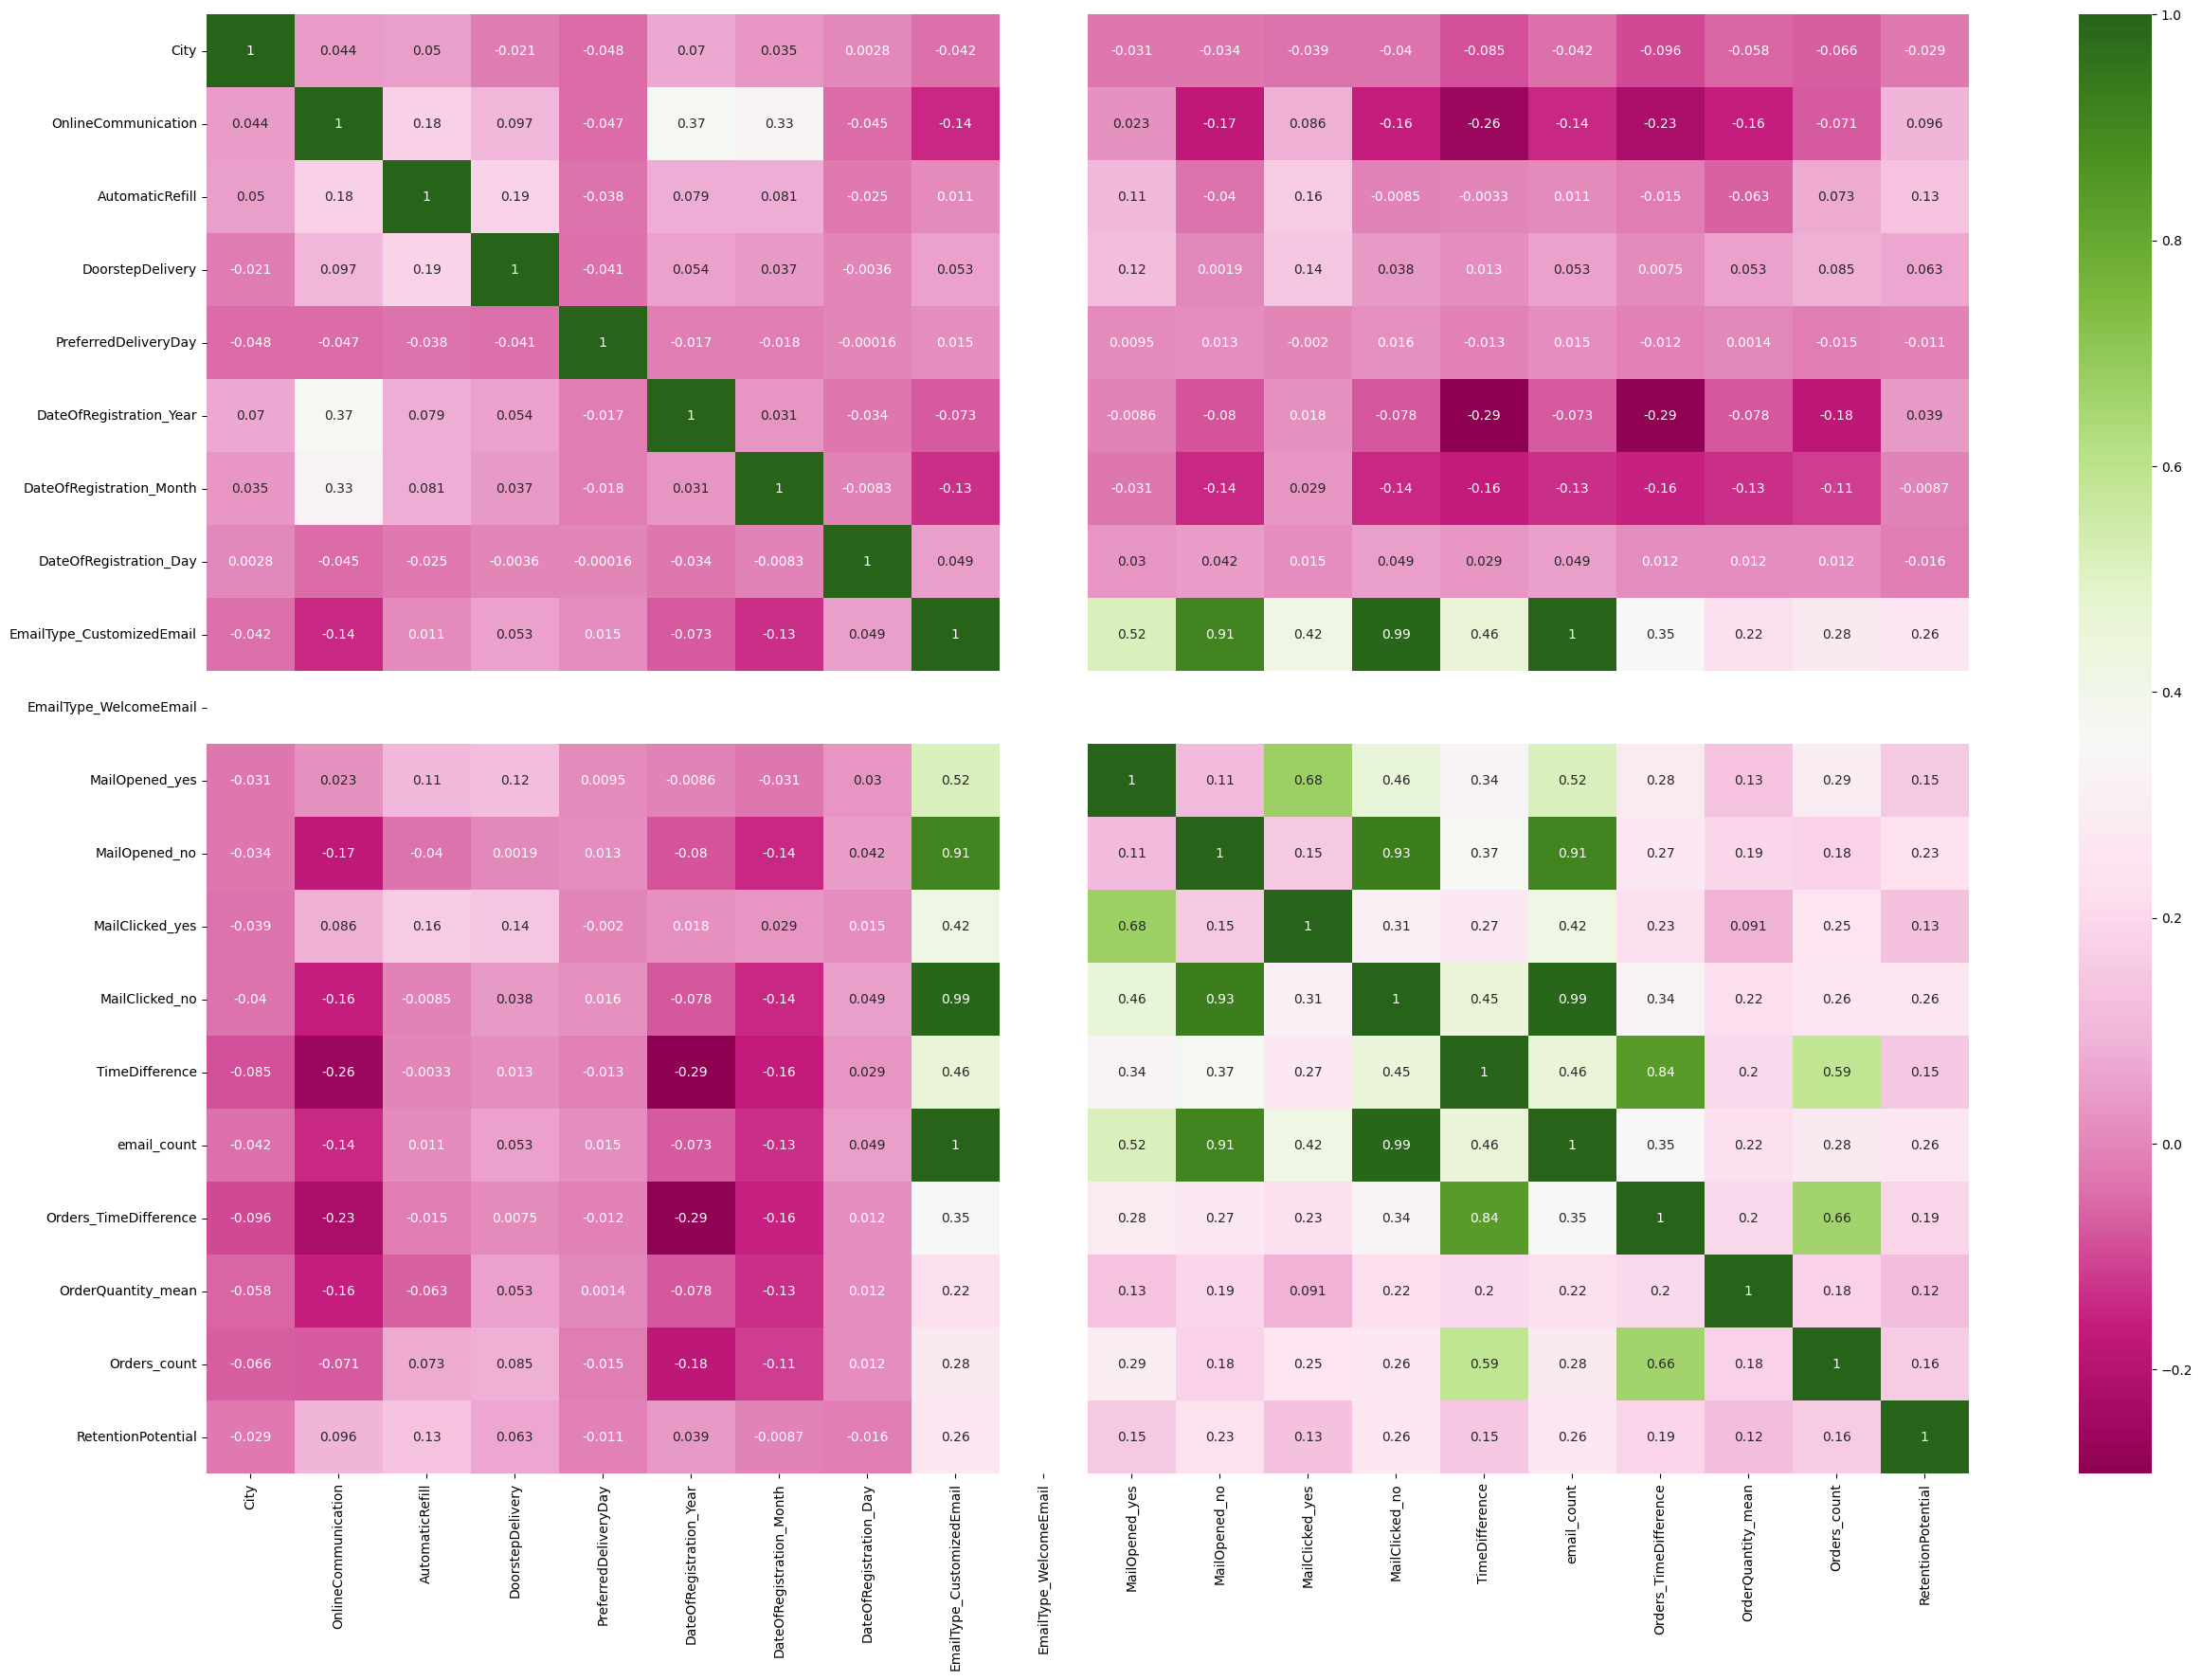

In [215]:
# Plot the heatmap

plt.figure(figsize=(30,20))
sns.heatmap(merged_data.corr(), annot=True, cmap='PiYG')

In [216]:
# Identify highly correlated columns
high_corr_cols = corr_matrix.abs().where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
high_corr_cols = high_corr_cols.stack().reset_index()
high_corr_cols.columns = ['col1', 'col2', 'correlation']
high_corr_cols = high_corr_cols[high_corr_cols['correlation'] > 0.9]


In [217]:
# Print the highly correlated columns and the correlation

high_corr_cols

,col1,col2,correlation
117,EmailType_CustomizedEmail,MailOpened_no,0.906364
119,EmailType_CustomizedEmail,MailClicked_no,0.993642
121,EmailType_CustomizedEmail,email_count,1.000000
136,MailOpened_no,MailClicked_no,0.928700
138,MailOpened_no,email_count,0.906364
151,MailClicked_no,email_count,0.993642


In [218]:
# Drop the highly correlated columns

merged_data = merged_data.drop(['MailClicked_no','email_count' ], axis=1)

In [219]:
merged_data = merged_data.drop(['CustomerID','EmailType_WelcomeEmail'], axis=1)

In [220]:
# Print the shape of the merged data

merged_data.shape

(23820, 17)

In [221]:
# Print the columns of merged data

merged_data.columns

Index(['City', 'OnlineCommunication', 'AutomaticRefill', 'DoorstepDelivery',
       'PreferredDeliveryDay', 'DateOfRegistration_Year',
       'DateOfRegistration_Month', 'DateOfRegistration_Day',
       'EmailType_CustomizedEmail', 'MailOpened_yes', 'MailOpened_no',
       'MailClicked_yes', 'TimeDifference', 'Orders_TimeDifference',
       'OrderQuantity_mean', 'Orders_count', 'RetentionPotential'],
      dtype='object')

In [222]:
# seperate the numerical columns from the data
num_cols = ['EmailType_CustomizedEmail','MailOpened_yes','MailOpened_no','MailClicked_yes','TimeDifference','Orders_TimeDifference',
            'OrderQuantity_mean','Orders_count']

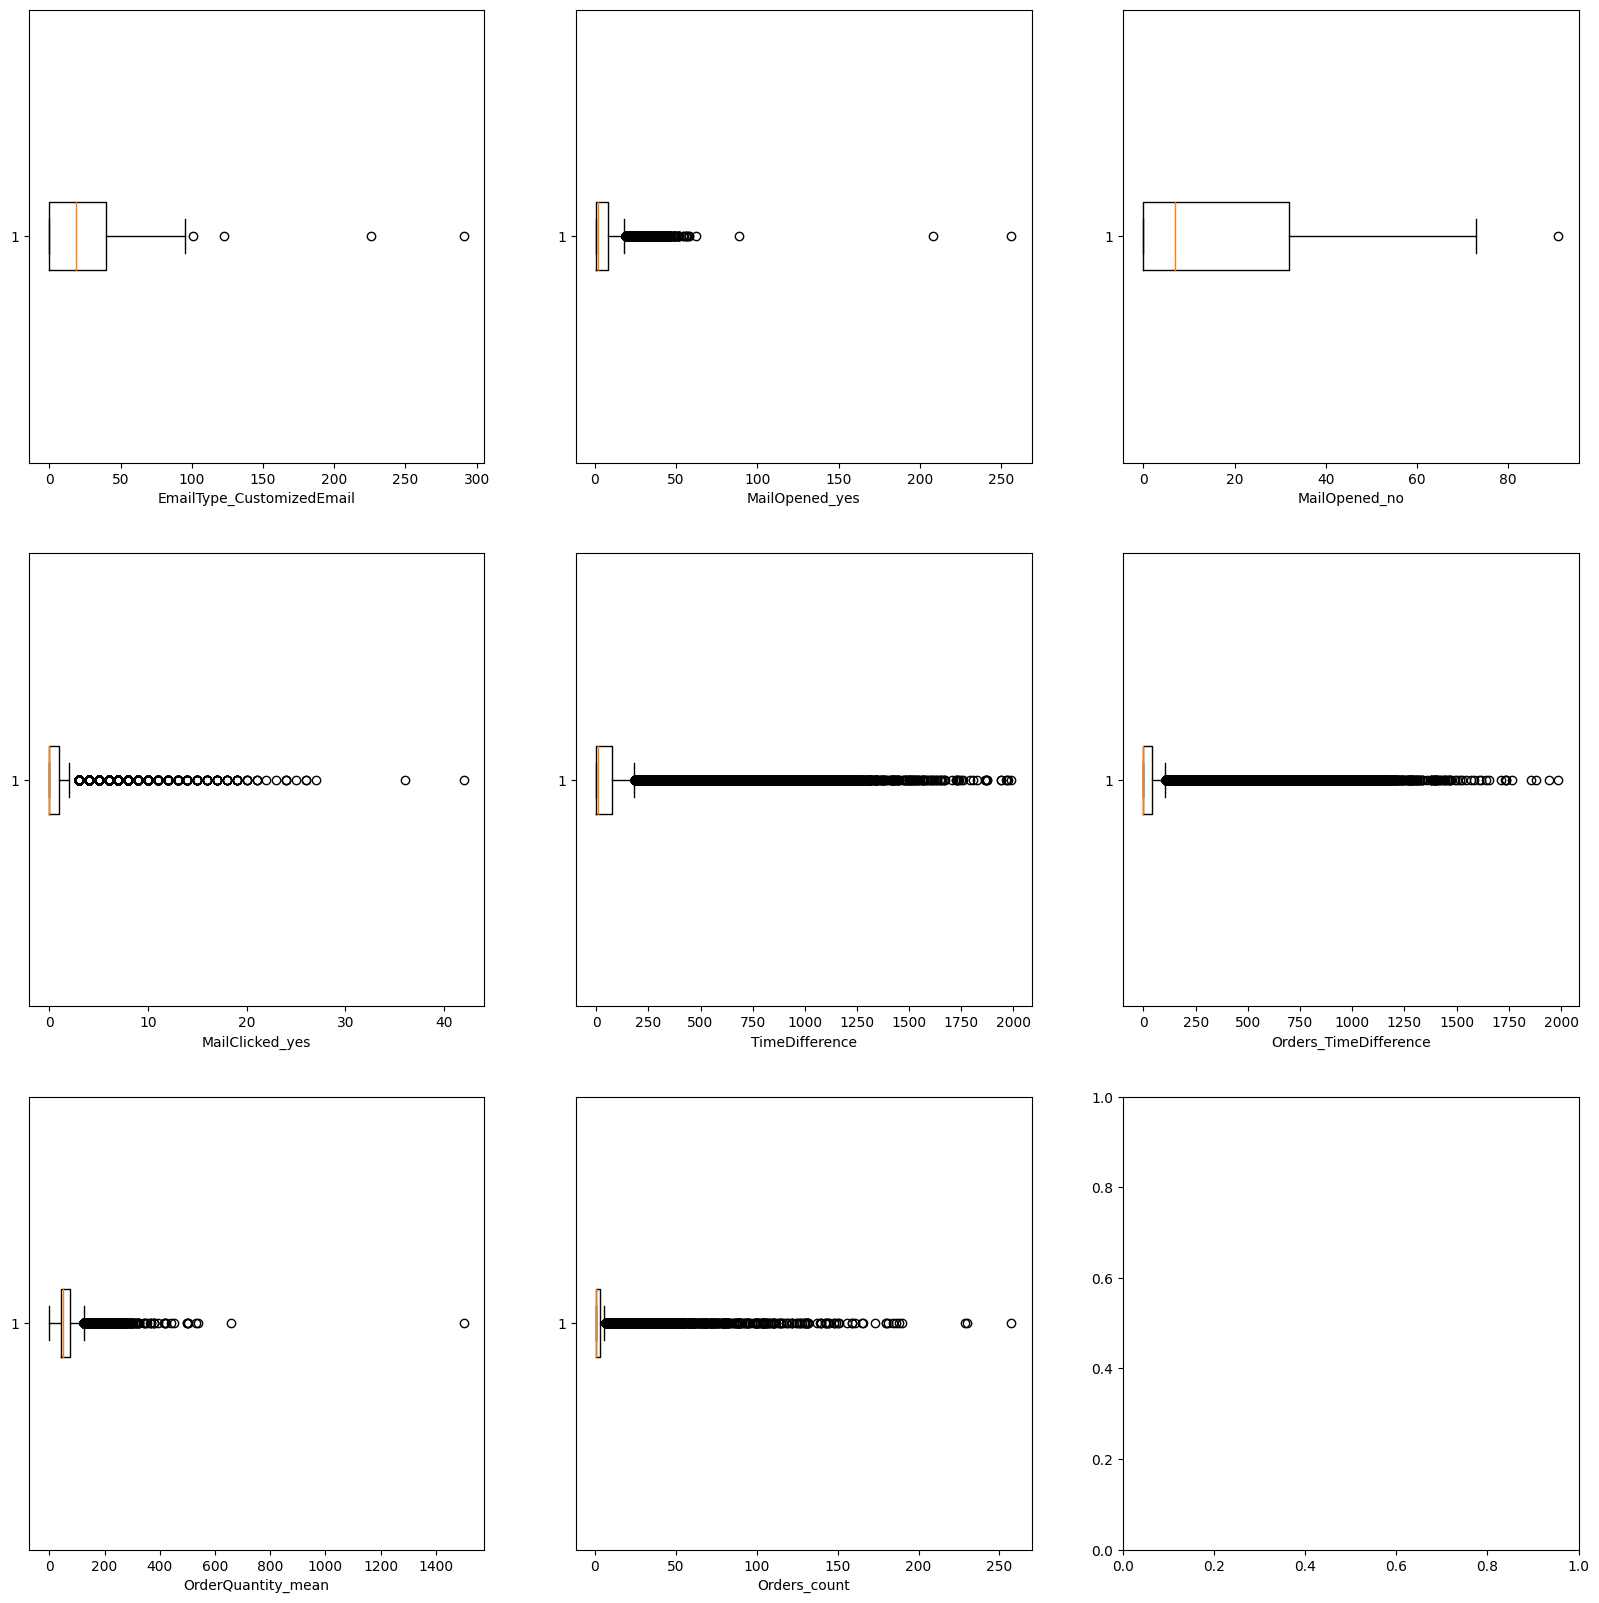

In [223]:
# Draw the boxplot for every numerical column
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 20))
for i, column in enumerate(num_cols):
    row = i // 3
    col = i % 3
    if row < 5:
        ax = axes[row][col]
        ax.boxplot(merged_data[column].dropna(), vert=False)
        ax.set_xlabel(column)
plt.show()

In [224]:
# save the dataframe as a CSV file
merged_data.to_csv('Customer_segmentation1.csv', index=False)

# Split Data

In [225]:
X = merged_data.drop(['RetentionPotential'], axis=1).values
y = merged_data['RetentionPotential'].values

In [226]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Model Building

## Decision Tree

In [ ]:
# Build the decision tree model
model1 = DecisionTreeClassifier(criterion='entropy', max_depth=10)
model1.fit(X_train, y_train)

# Evaluate the performance of the model
y_train_pred1 = model1.predict(X_train)

y_test_pred1 = model1.predict(X_test)

In [ ]:
print(classification_report(y_train, y_train_pred1))

              precision    recall  f1-score   support

           0       0.78      0.65      0.70      3005
           1       0.93      0.96      0.95     15348
           2       0.99      0.91      0.95       703

    accuracy                           0.91     19056
   macro avg       0.90      0.84      0.87     19056
weighted avg       0.91      0.91      0.91     19056



In [ ]:
print(classification_report(y_test, y_test_pred1))

              precision    recall  f1-score   support

           0       0.74      0.63      0.68       751
           1       0.92      0.95      0.94      3837
           2       0.87      0.82      0.85       176

    accuracy                           0.90      4764
   macro avg       0.84      0.80      0.82      4764
weighted avg       0.89      0.90      0.89      4764



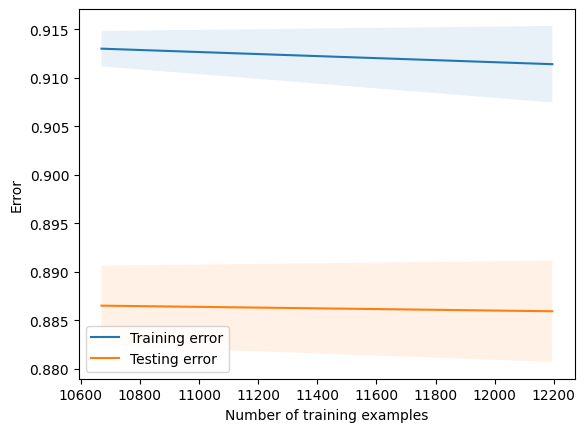

In [ ]:
# Use your actual training set data instead of defining a range of sizes
train_sizes = [0.8, 0.7]

# Compute learning curves with your actual data
train_sizes, train_scores, test_scores = learning_curve(model1, X_train, y_train,
                                                        train_sizes=train_sizes,
                                                        cv=5)
# Calculate the mean and standard deviation of the training and testing scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.plot(train_sizes, train_mean, label='Training error')
plt.plot(train_sizes, test_mean, label='Testing error')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)
plt.xlabel('Number of training examples')
plt.ylabel('Error')
plt.legend()
plt.show()

In [ ]:
# Define the hyperparameter values to test
param_range = np.arange(1, 11)

# Plot the validation curve for the max_depth hyperparameter
train_scores, test_scores = validation_curve(model1, X, y, param_name='max_depth', param_range=param_range, cv=10, scoring='accuracy', n_jobs=-1)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure()
plt.title('Validation Curve')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.ylim(0.0, 1.1)
plt.semilogx(param_range, train_mean, 'o-', color='r', label='Training Accuracy')
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, alpha=0.1, color='r')
plt.semilogx(param_range, test_mean, 'o-', color='g', label='Cross-validation Accuracy')
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, alpha=0.1, color='g')
plt.legend(loc='best')
plt.show()

## Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
param = {'max_depth':[5,6,7,10,11,13,15],  
         'min_samples_leaf':[10,12,15,13,20],
         'min_samples_split':[2,3,4,5],
        'criterion':['gini','entropy']}

hyp_model1 = GridSearchCV(model1, param, cv=4 )  
best_dec = hyp_model1.fit(X_train, y_train) 

In [ ]:
best_dec.best_params_

In [ ]:
# Extract the best estimator (decision tree) from the GridSearchCV object
best_dt = hyp_model1.best_estimator_

In [ ]:
y_train_pred1_hyp = best_dt.predict(X_train)
y_test_pred1_hyp = best_dt.predict(X_test)

In [ ]:
print(classification_report(y_train, y_train_pred1_hyp))

In [ ]:
print(classification_report(y_test, y_test_pred1_hyp))

              precision    recall  f1-score   support

           0       0.70      0.61      0.65       751
           1       0.92      0.95      0.94      3837
           2       0.90      0.80      0.85       176

    accuracy                           0.89      4764
   macro avg       0.84      0.79      0.81      4764
weighted avg       0.89      0.89      0.89      4764

              precision    recall  f1-score   support

           0       0.70      0.61      0.65       751
           1       0.92      0.95      0.94      3837
           2       0.90      0.80      0.85       176

    accuracy                           0.89      4764
   macro avg       0.84      0.79      0.81      4764
weighted avg       0.89      0.89      0.89      4764



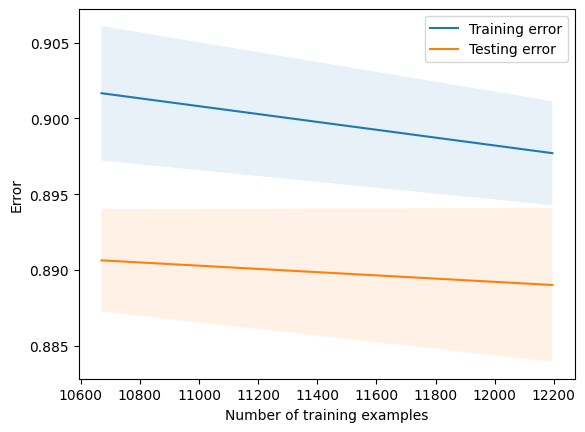

In [ ]:
# Use your actual training set data instead of defining a range of sizes
train_sizes = [0.8, 0.7]

# Compute learning curves with your actual data
train_sizes, train_scores, test_scores = learning_curve(hyp_model1, X_train, y_train,
                                                        train_sizes=train_sizes,
                                                        cv=5)
# Calculate the mean and standard deviation of the training and testing scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.plot(train_sizes, train_mean, label='Training error')
plt.plot(train_sizes, test_mean, label='Testing error')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)
plt.xlabel('Number of training examples')
plt.ylabel('Error')
plt.legend()
plt.show()

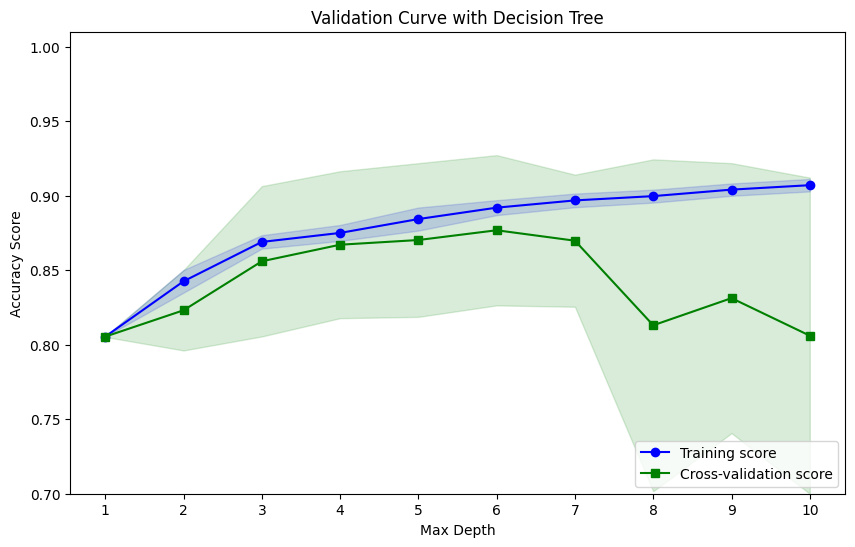

In [ ]:
# Get the best estimator found by GridSearchCV
best_estimator = hyp_model1.best_estimator_

# Create a new DecisionTreeClassifier object with the same parameters as the best estimator
dtc = DecisionTreeClassifier(criterion=best_estimator.criterion, max_depth=best_estimator.max_depth, min_samples_leaf=best_estimator.min_samples_leaf, min_samples_split=best_estimator.min_samples_split)

# Plot the validation curve for the max_depth hyperparameter
train_scores, test_scores = validation_curve(dtc, X, y, param_name='max_depth', param_range=param_range, cv=10, scoring='accuracy', n_jobs=-1)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the validation curve
plt.figure(figsize=(10,6))
plt.title('Validation Curve with Decision Tree')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy Score')
plt.ylim(0.7, 1.01)
plt.xticks(param_range)
plt.plot(param_range, train_mean, label='Training score', color='blue', marker='o')
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, alpha=0.15, color='blue')
plt.plot(param_range, test_mean, label='Cross-validation score', color='green', marker='s')
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, alpha=0.15, color='green')
plt.legend(loc='lower right')
plt.show()

## SVC

In [ ]:
# Create SVM model
model2 = SVC(kernel='linear')

# Train SVM model
model2.fit(X_train, y_train.ravel())

# Evaluate the performance of the model
y_train_pred2 = model2.predict(X_train)

y_test_pred2 = model2.predict(X_test)

In [ ]:
print(classification_report(y_train, y_train_pred2))

              precision    recall  f1-score   support

           0       0.55      0.52      0.54      3005
           1       0.89      0.92      0.91     15348
           2       0.94      0.44      0.60       703

    accuracy                           0.84     19056
   macro avg       0.79      0.63      0.68     19056
weighted avg       0.84      0.84      0.84     19056



In [ ]:
print(classification_report(y_test, y_test_pred2))

              precision    recall  f1-score   support

           0       0.59      0.54      0.56       751
           1       0.90      0.93      0.91      3837
           2       0.91      0.51      0.65       176

    accuracy                           0.85      4764
   macro avg       0.80      0.66      0.71      4764
weighted avg       0.85      0.85      0.85      4764



## Random Forest

In [ ]:
#Create Random Forest model
model3 = RandomForestClassifier()

# Train Random Forest model
model3.fit(X_train, y_train)

# Evaluate the performance of the model
y_train_pred3 = model3.predict(X_train)

y_test_pred3 = model3.predict(X_test)

In [ ]:
print(classification_report(y_train, y_train_pred3))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95      3005
           1       0.99      0.99      0.99     15348
           2       1.00      0.99      0.99       703

    accuracy                           0.98     19056
   macro avg       0.98      0.97      0.98     19056
weighted avg       0.98      0.98      0.98     19056



In [ ]:
print(classification_report(y_test, y_test_pred3))

              precision    recall  f1-score   support

           0       0.72      0.64      0.68       751
           1       0.93      0.95      0.94      3837
           2       0.93      0.85      0.89       176

    accuracy                           0.90      4764
   macro avg       0.86      0.81      0.83      4764
weighted avg       0.89      0.90      0.90      4764



## Hyperparameter Tuning

In [ ]:
# Define hyperparameters to tune
param_grid = {'n_estimators': [10, 25, 50, 100],
              'max_depth': [None, 5, 10, 20],
              'max_features': ['sqrt', 'log2', None],
              'min_samples_leaf':[10,12,15,13,20],
              'min_samples_split':[2,3,4,5],
              'criterion':['gini','entropy']}

# Define grid search
hyp_model3 = RandomizedSearchCV(estimator=model3, param_distributions=param_grid, cv=5)

# Train SVM model with grid search
best_rf = hyp_model3.fit(X_train, y_train)

# Predict test set with best parameters
best_rf.best_params_

{'n_estimators': 25,
 'min_samples_split': 5,
 'min_samples_leaf': 10,
 'max_features': None,
 'max_depth': 20,
 'criterion': 'entropy'}

In [ ]:
y_train_pred3_hyp = hyp_model3.predict(X_train)
y_test_pred3_hyp = hyp_model3.predict(X_test)

In [ ]:
print(classification_report(y_train, y_train_pred3_hyp))

              precision    recall  f1-score   support

           0       0.80      0.72      0.76      3005
           1       0.94      0.97      0.95     15348
           2       0.95      0.82      0.88       703

    accuracy                           0.92     19056
   macro avg       0.90      0.83      0.86     19056
weighted avg       0.92      0.92      0.92     19056



In [ ]:
print(classification_report(y_test, y_test_pred3_hyp))

              precision    recall  f1-score   support

           0       0.73      0.65      0.69       751
           1       0.93      0.95      0.94      3837
           2       0.94      0.84      0.89       176

    accuracy                           0.90      4764
   macro avg       0.87      0.82      0.84      4764
weighted avg       0.90      0.90      0.90      4764



## Naive Bayes

In [ ]:
# Create Naive Bayes model
model4 = GaussianNB()

# Train Naive Bayes model
model4.fit(X_train, y_train)

# Evaluate the performance of the model
y_train_pred4 = model4.predict(X_train)

y_test_pred4 = model4.predict(X_test)

In [ ]:
print(classification_report(y_train, y_train_pred4))

              precision    recall  f1-score   support

           0       0.35      0.92      0.51      3005
           1       0.97      0.66      0.78     15348
           2       0.49      0.49      0.49       703

    accuracy                           0.69     19056
   macro avg       0.60      0.69      0.59     19056
weighted avg       0.85      0.69      0.73     19056



In [ ]:
print(classification_report(y_test, y_test_pred4))

              precision    recall  f1-score   support

           0       0.35      0.94      0.52       751
           1       0.98      0.66      0.79      3837
           2       0.58      0.56      0.57       176

    accuracy                           0.70      4764
   macro avg       0.64      0.72      0.62      4764
weighted avg       0.87      0.70      0.74      4764



##KNN

In [ ]:
model5 = KNeighborsClassifier()

# Train KNN model
model5.fit(X_train, y_train)

# Evaluate the performance of the model
y_train_pred5 = model5.predict(X_train)

y_test_pred5 = model5.predict(X_test)

In [ ]:
print(classification_report(y_train, y_train_pred5))

              precision    recall  f1-score   support

           0       0.74      0.56      0.64      3005
           1       0.91      0.97      0.94     15348
           2       0.85      0.56      0.67       703

    accuracy                           0.89     19056
   macro avg       0.84      0.70      0.75     19056
weighted avg       0.88      0.89      0.88     19056



In [ ]:
print(classification_report(y_test, y_test_pred5))

              precision    recall  f1-score   support

           0       0.63      0.45      0.52       751
           1       0.89      0.95      0.92      3837
           2       0.83      0.57      0.67       176

    accuracy                           0.86      4764
   macro avg       0.78      0.66      0.71      4764
weighted avg       0.85      0.86      0.85      4764



## Hyperparameter Tuning

In [ ]:
param_grid = {'n_neighbors': [3, 5, 7, 9, 11], 
              'weights': ['uniform', 'distance']}

# Define grid search
hyp_model5 = RandomizedSearchCV(estimator=model5, param_distributions=param_grid, cv=5)

# Train SVM model with grid search
best_knn = hyp_model5.fit(X_train, y_train)

# Predict test set with best parameters
best_knn.best_params_

{'weights': 'uniform', 'n_neighbors': 11}

In [ ]:
y_train_pred5_hyp = hyp_model5.predict(X_train)
y_test_pred5_hyp = hyp_model5.predict(X_test)

In [ ]:
print(classification_report(y_train, y_train_pred5_hyp))

              precision    recall  f1-score   support

           0       0.73      0.46      0.56      3005
           1       0.89      0.97      0.93     15348
           2       0.81      0.49      0.61       703

    accuracy                           0.87     19056
   macro avg       0.81      0.64      0.70     19056
weighted avg       0.86      0.87      0.86     19056



In [ ]:
print(classification_report(y_test, y_test_pred5_hyp))

              precision    recall  f1-score   support

           0       0.66      0.37      0.47       751
           1       0.88      0.97      0.92      3837
           2       0.84      0.52      0.65       176

    accuracy                           0.86      4764
   macro avg       0.79      0.62      0.68      4764
weighted avg       0.84      0.86      0.84      4764



## Gradient Boosting

In [227]:
# Create GBM model
model6 = GradientBoostingClassifier()

# Train GBM model
model6.fit(X_train, y_train)

# Evaluate the performance of the model
y_train_pred6 = model6.predict(X_train)

y_test_pred6 = model6.predict(X_test)

In [228]:
print(classification_report(y_train, y_train_pred6))

              precision    recall  f1-score   support

           0       0.75      0.60      0.67      3005
           1       0.92      0.96      0.94     15348
           2       0.96      0.84      0.89       703

    accuracy                           0.90     19056
   macro avg       0.88      0.80      0.83     19056
weighted avg       0.89      0.90      0.90     19056



In [229]:
print(classification_report(y_test, y_test_pred6))

              precision    recall  f1-score   support

           0       0.76      0.60      0.67       751
           1       0.92      0.96      0.94      3837
           2       0.97      0.83      0.89       176

    accuracy                           0.90      4764
   macro avg       0.88      0.80      0.83      4764
weighted avg       0.90      0.90      0.90      4764



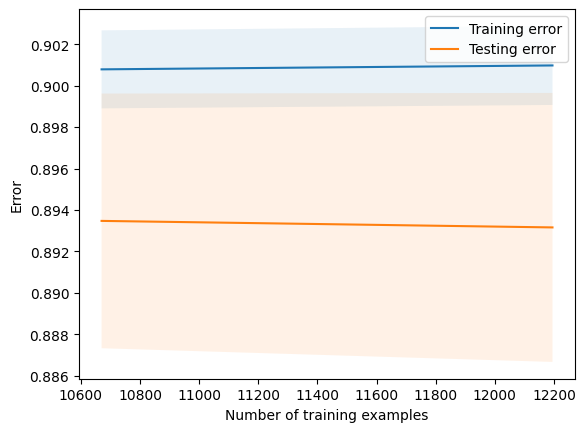

In [230]:
train_sizes = [0.8,0.7]

# Compute learning curves with your actual data
train_sizes, train_scores, test_scores = learning_curve(model6, X_train, y_train,
                                                        train_sizes=train_sizes,
                                                        cv=5)
# Calculate the mean and standard deviation of the training and testing scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.plot(train_sizes, train_mean, label='Training error')
plt.plot(train_sizes, test_mean, label='Testing error')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)
plt.xlabel('Number of training examples')
plt.ylabel('Error')
plt.legend()
plt.show()

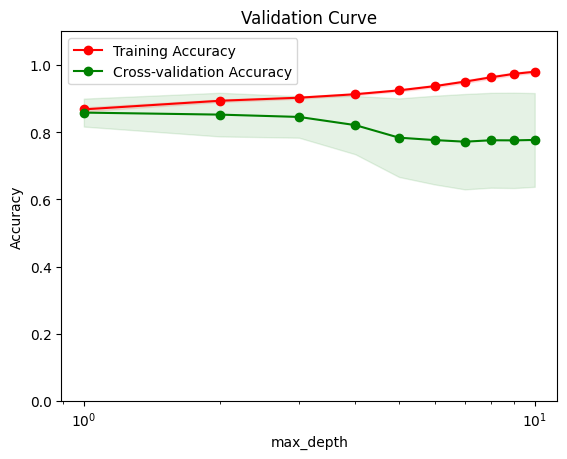

In [ ]:
# Define the hyperparameter values to test
param_range = np.arange(1, 11)

# Plot the validation curve for the max_depth hyperparameter
train_scores, test_scores = validation_curve(model6, X, y, param_name='max_depth', param_range=param_range, cv=10, scoring='accuracy', n_jobs=-1)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure()
plt.title('Validation Curve')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.ylim(0.0, 1.1)
plt.semilogx(param_range, train_mean, 'o-', color='r', label='Training Accuracy')
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, alpha=0.1, color='r')
plt.semilogx(param_range, test_mean, 'o-', color='g', label='Cross-validation Accuracy')
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, alpha=0.1, color='g')
plt.legend(loc='best')
plt.show()

## Hyperparameter Tuning

In [235]:
param_grid = {'n_estimators': [50, 100, 150], 
              'learning_rate': [0.1, 0.05, 0.01], 
              'max_depth': [3, 4, 5],
              'min_samples_leaf':[10,12,15,13,20],
              'min_samples_split':[2,3,4,5],}

# Define grid search
hyp_model6 = RandomizedSearchCV(estimator=model6, param_distributions=param_grid, cv=5)

# Train SVM model with grid search
best_grb = hyp_model6.fit(X_train, y_train)

# Predict test set with best parameters
best_grb.best_params_

{'n_estimators': 150,
 'min_samples_split': 4,
 'min_samples_leaf': 20,
 'max_depth': 5,
 'learning_rate': 0.05}

In [236]:
y_train_pred6_hyp = hyp_model6.predict(X_train)
y_test_pred6_hyp = hyp_model6.predict(X_test)

In [237]:
print(classification_report(y_train, y_train_pred6_hyp))

              precision    recall  f1-score   support

           0       0.78      0.66      0.72      3005
           1       0.93      0.96      0.95     15348
           2       0.97      0.88      0.93       703

    accuracy                           0.91     19056
   macro avg       0.90      0.83      0.86     19056
weighted avg       0.91      0.91      0.91     19056



In [238]:
print(classification_report(y_test, y_test_pred6_hyp))

              precision    recall  f1-score   support

           0       0.75      0.64      0.69       751
           1       0.93      0.96      0.94      3837
           2       0.96      0.87      0.91       176

    accuracy                           0.90      4764
   macro avg       0.88      0.82      0.85      4764
weighted avg       0.90      0.90      0.90      4764



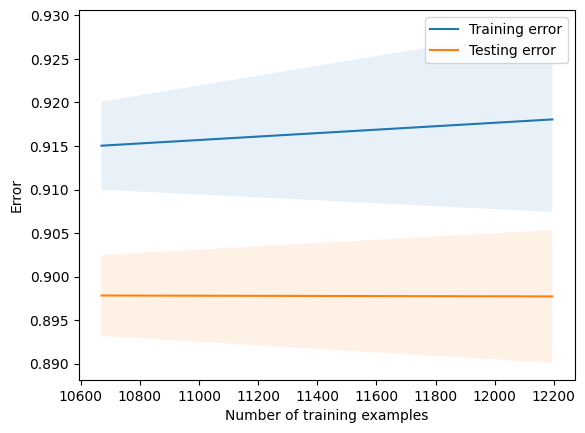

In [ ]:
# Use your actual training set data instead of defining a range of sizes
train_sizes = [0.8, 0.7]

# Compute learning curves with your actual data
train_sizes, train_scores, test_scores = learning_curve(hyp_model6, X_train, y_train,
                                                        train_sizes=train_sizes,
                                                        cv=5)
# Calculate the mean and standard deviation of the training and testing scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.plot(train_sizes, train_mean, label='Training error')
plt.plot(train_sizes, test_mean, label='Testing error')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)
plt.xlabel('Number of training examples')
plt.ylabel('Error')
plt.legend()
plt.show()

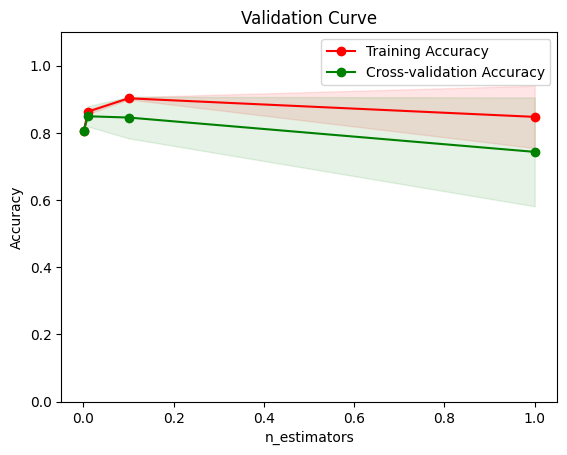

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import validation_curve

# Define the hyperparameter values to test
param_range = np.logspace(-3, 0, 4)
best_estimator = hyp_model6.best_estimator_

# Create a new gradient boosting object with the same parameters as the best estimator
gb = GradientBoostingClassifier(learning_rate=best_estimator.learning_rate, n_estimators=best_estimator.n_estimators)

# Plot the validation curve for the n_estimators hyperparameter

train_scores, test_scores = validation_curve(gb, X, y, param_name='learning_rate', param_range=param_range, cv=10, scoring='accuracy', n_jobs=-1)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure()
plt.title('Validation Curve')
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.ylim(0.0, 1.1)
plt.plot(param_range, train_mean, 'o-', color='r', label='Training Accuracy')
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, alpha=0.1, color='r')
plt.plot(param_range, test_mean, 'o-', color='g', label='Cross-validation Accuracy')
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, alpha=0.1, color='g')
plt.legend(loc='best')
plt.show()

## XGBoost

In [ ]:
# Instantiate the XGBoost model
model7 = xgb.XGBClassifier()

# Fit the model to the training data
model7.fit(X_train, y_train)

# Make predictions on the test data and train data
y_train_pred7 = model7.predict(X_train)
y_test_pred7 = model7.predict(X_test)

In [ ]:
print(classification_report(y_train, y_train_pred7))

              precision    recall  f1-score   support

           0       0.87      0.77      0.82      3005
           1       0.95      0.98      0.97     15348
           2       1.00      0.95      0.98       703

    accuracy                           0.94     19056
   macro avg       0.94      0.90      0.92     19056
weighted avg       0.94      0.94      0.94     19056



In [ ]:
print(classification_report(y_test, y_test_pred7))

              precision    recall  f1-score   support

           0       0.75      0.62      0.68       751
           1       0.92      0.96      0.94      3837
           2       0.95      0.88      0.91       176

    accuracy                           0.90      4764
   macro avg       0.88      0.82      0.84      4764
weighted avg       0.90      0.90      0.90      4764



## Hyperparameter Tuning

In [ ]:
# Define the hyperparameter space
param_dist = {'max_depth': [3, 4, 5, 6, 7],
              'learning_rate': [0.01, 0.05, 0.1, 0.3, 0.5],
              'n_estimators': [50, 100, 150, 200, 250],
              'subsample': [0.5, 0.6, 0.7, 0.8, 0.9],
              'colsample_bytree': [0.5, 0.6, 0.7, 0.8, 0.9],
              'gamma': [0, 1, 2, 3, 4]}


# Define the RandomizedSearchCV object
hyp_model7 = RandomizedSearchCV(estimator=model7, param_distributions=param_dist, cv=5)

# Fit the RandomizedSearchCV object to the training data
best_xgb = hyp_model7.fit(X_train, y_train)

# Predict test set with best parameters
best_xgb.best_params_

{'subsample': 0.7,
 'n_estimators': 250,
 'max_depth': 5,
 'learning_rate': 0.5,
 'gamma': 3,
 'colsample_bytree': 0.8}

In [ ]:
y_train_pred7_hyp = hyp_model7.predict(X_train)
y_test_pred7_hyp = hyp_model7.predict(X_test)

In [ ]:
print(classification_report(y_train, y_train_pred7_hyp))

              precision    recall  f1-score   support

           0       0.79      0.69      0.73      3005
           1       0.94      0.96      0.95     15348
           2       0.98      0.88      0.93       703

    accuracy                           0.92     19056
   macro avg       0.90      0.84      0.87     19056
weighted avg       0.91      0.92      0.91     19056



In [ ]:
print(classification_report(y_test, y_test_pred7_hyp))

              precision    recall  f1-score   support

           0       0.74      0.66      0.70       751
           1       0.93      0.96      0.94      3837
           2       0.95      0.86      0.90       176

    accuracy                           0.90      4764
   macro avg       0.87      0.83      0.85      4764
weighted avg       0.90      0.90      0.90      4764



##Logistic Regression

In [ ]:
# Train a binary logistic regression model for each class
model8 = OneVsRestClassifier(LogisticRegression())
model8.fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

OneVsRestClassifier(estimator=LogisticRegression())

In [ ]:
# Make predictions on the test data and train data
y_train_pred8 = model8.predict(X_train)
y_test_pred8 = model8.predict(X_test)

In [ ]:
print(classification_report(y_train, y_train_pred8))

              precision    recall  f1-score   support

           0       0.55      0.07      0.13      3005
           1       0.83      0.99      0.90     15348
           2       0.80      0.35      0.48       703

    accuracy                           0.82     19056
   macro avg       0.72      0.47      0.50     19056
weighted avg       0.78      0.82      0.76     19056



In [ ]:
print(classification_report(y_test, y_test_pred8))

              precision    recall  f1-score   support

           0       0.48      0.05      0.10       751
           1       0.83      0.99      0.90      3837
           2       0.82      0.40      0.54       176

    accuracy                           0.82      4764
   macro avg       0.71      0.48      0.51      4764
weighted avg       0.77      0.82      0.76      4764



In [ ]:
import pickle

# Save the trained model to a file
with open('Final.pkl', 'wb') as file:
    pickle.dump(hyp_model6, file)

# Load the saved model from file
with open('Final.pkl', 'rb') as file:
    saved_model = pickle.load(file)


#Test Data

In [240]:
# Read the preprocessed test data 

test_data = pd.read_csv('/content/drive/MyDrive/CAPSTONE/Test/Customer_segmentation_test.csv')
test_data.head()

,CustomerID,City,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,DateOfRegistration_Year,DateOfRegistration_Month,DateOfRegistration_Day,EmailType_CustomizedEmail,MailOpened_yes,MailOpened_no,MailClicked_yes,TimeDifference,Orders_TimeDifference,OrderQuantity_mean,Orders_count
0,C17838,3.0,0,0,0,4.0,2010,10,22,0,1,0,0,0,0,55.000000,1
1,C12403,1.0,1,1,0,6.0,2008,11,17,46,38,9,7,1868,1190,175.815476,168
2,C19041,3.0,0,1,0,0.0,2011,1,24,60,27,34,4,1072,976,117.385246,122
3,C24069,1.0,0,0,0,6.0,2010,9,18,45,1,45,0,51,0,47.000000,1
4,C26718,1.0,1,0,0,1.0,2010,10,2,13,9,5,2,1198,1083,156.883721,129


In [241]:
#check the shape of the data
test_data.shape

(5955, 17)

In [242]:
# drop the customerid column
test_data1 = test_data.drop('CustomerID', axis=1)

In [ ]:
#check the null values
test_data1.isnull().sum()

City                         0
OnlineCommunication          0
AutomaticRefill              0
DoorstepDelivery             0
PreferredDeliveryDay         0
DateOfRegistration_Year      0
DateOfRegistration_Month     0
DateOfRegistration_Day       0
EmailType_CustomizedEmail    0
MailOpened_yes               0
MailOpened_no                0
MailClicked_yes              0
TimeDifference               0
Orders_TimeDifference        0
OrderQuantity_mean           0
Orders_count                 0
dtype: int64

## Predictions

In [243]:
# Evaluate the performance of the model
test_pred1 = hyp_model6.predict(test_data1)
test_pred1

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(


array([0, 1, 1, ..., 1, 1, 1])

In [244]:
#check the size of the predictions
test_pred1.size

5955

In [245]:
# convert the predictions in to dataframe
predictions = pd.DataFrame(test_pred1, columns = ['RetentionPotential'])
predictions.head()

,RetentionPotential
0,0
1,1
2,1
3,1
4,2


In [246]:
# Get the frequency of each unique value
values, counts = np.unique(test_pred1, return_counts=True)

# Print the results
for value, count in zip(values, counts):
    print(f"{value}: {count}")

0: 807
1: 4951
2: 197


In [247]:
submission = pd.DataFrame({ 'CustomerID': test_data.CustomerID.values, 'RetentionPotential':test_pred1})
submission.to_csv("my_submission.csv", index=False)